# **Logistic  Regression on Multi Class Classification**
Here, I have fetched dataset from UCI-Machine Learning Repository.

The dataset description is present here: https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/hydraulic_description 

The Hydraulic dataset has total 5 features including Pump Leakage which has 3 attributes:

*   0: no leakage
*   1: weak leakage
*   2: severe leakage

Pump_leakage is going to be our target value. 0,1 and 2 will be our classes.

By applying multi class classification we will identify that how well the hydraulic pump leakage is classified with the given values.

The ROC curve for class 0 will be drawn against class 1 and 2.

Similarly, the ROC curve or class 1 will be drawn against class 0 and 2.

Lastly, the ROC curve for class 2 will be drawn against class 0 and 1.



In [ ]:
#import libraries
from sklearn import metrics
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
#multiclass model
from sklearn.multiclass import OneVsRestClassifier
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

git_url_dataset= "https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/hydraulic.csv"

hydraulic= pd.read_csv(git_url_dataset)
print("Total no. of rows: ", hydraulic.shape[0], " | Total no. of columns: ", hydraulic.shape[1],)
hydraulic.head()



Total no. of rows:  2205  | Total no. of columns:  5


,Cooler,Valve,Pump_Leakage,Accumulator,Stable_flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [ ]:
# Internal pump leakage:
# 	0: no leakage
# 	1: weak leakage
# 	2: severe leakage

print("Pump leakage distribution")
print(hydraulic.groupby('Pump_Leakage').size())

X=hydraulic.drop(["Pump_Leakage"], axis=1)
y=hydraulic["Pump_Leakage"]
train_X,test_X,train_y,test_y = train_test_split (X,y,test_size=0.2,random_state=3)

train_samples, n_features = train_X.shape
n_classes = np.unique(y).shape[0]

print('Hydraulic Dataset, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

Pump leakage distribution
Pump_Leakage
0    1221
1     492
2     492
dtype: int64
Hydraulic Dataset, train_samples=1764, n_features=4, n_classes=3


In [ ]:

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
pred_prob = clf.predict_proba(test_X)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(test_y, pred_prob[:,i], pos_label=i)
    # print(fpr[i], tpr[i], thresh[i])


#calculating accuracy
accuracy = np.sum(pred == test_y) / test_y.shape[0]
print("accuracy:",accuracy)
confusion = metrics.multilabel_confusion_matrix(test_y, pred)
print("confusion matrix:\n",confusion)



accuracy: 0.5328798185941043
confusion matrix:
 [[[102  89]
  [ 57 193]]

 [[259  91]
  [ 58  33]]

 [[315  26]
  [ 91   9]]]


## **Plotting Multi Class ROC Curve**
The area under the ROC curve (AUC) is a useful tool for evaluating the quality of class separation for  classifiers. 

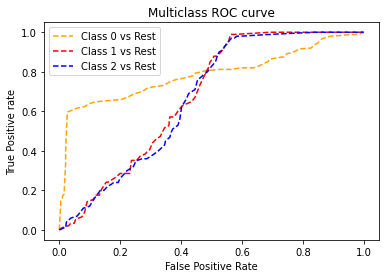

In [ ]:
#plotting Multiclass ROC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500);  


## **Comparison of Multinomial Vs. OVR Logistic Regression)**


Here we are doing a comparison of multinomial logistic L1 vs one-versus-rest L1 logistic regression to classify the Pump Leakage with respect to other features. 
Here, we found that Multinomial logistic regression yields more accurate results than one-versus-rest LR and also, Multinomial logistic is considered to be faster when you need to train on the larger scale dataset.

Here, we visualize the "performance" of multi-class models according to their curves. 

Model= One versus Rest
------------------------------------------------------------
Accuracy=0.5668934240362812, Number of epochs: 1, Run time 0.01
Accuracy=0.5510204081632653, Number of epochs: 9, Run time 0.01
Accuracy=0.5555555555555556, Number of epochs: 19, Run time 0.02
------------------------------------------------------------
Model= Multinomial
------------------------------------------------------------
Accuracy=0.5668934240362812, Number of epochs: 1, Run time 0.01
Accuracy=0.5578231292517006, Number of epochs: 7, Run time 0.01
Accuracy=0.5691609977324263, Number of epochs: 21, Run time 0.02
------------------------------------------------------------
Total time run in 0.148 s


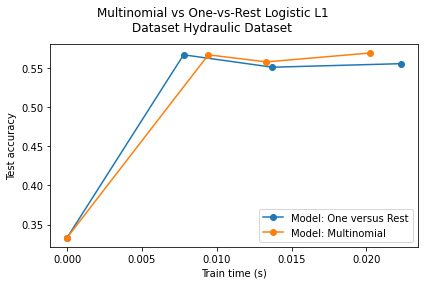

In [ ]:
#To skip warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
#Record run time
import timeit


warnings.filterwarnings("ignore", category=ConvergenceWarning,module="sklearn")
t0 = timeit.default_timer()

# We use lbfgs solver since our dataset is not too large
# In case dataset is larger than "saga" should be use as a solver and set n_sample to "10000"
solver = 'lbfgs'

# Turn down for faster run time
n_samples = 10000

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 9, 19]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 7, 21]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]

    model_params = models[model]
    print('Model=',model_params['name'])
    print ("--"*30)

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(train_X, train_y)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(test_X)
        accuracy = np.sum(y_pred == test_y) / test_y.shape[0]
        print('Accuracy=%s, Number of epochs: %s, Run time %.2f' %
              (accuracy, this_max_iter,train_time))
        
        accuracies.append(accuracy)
        times.append(train_time)
    
    models[model]['times'] = times
    models[model]['accuracies'] = accuracies
    
    print ("--"*30)

#Plotting times,accuracies w.r.t model
fig = plt.figure()
ax = fig.add_subplot(111)
for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % 'Hydraulic Dataset')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Total time run in %.3f s' % run_time)
plt.show()
